

# Project: Investigate a TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
### Questions to ask:
#### 1- what genre of movies is most popular?
#### 2- what properties of movies with high revenue?


In [2]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load dataset
df=pd.read_csv('tmdb-movies.csv')
#visualize dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [8]:
#data set dimensionality
df.shape

(10866, 21)

In [9]:
#columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning (remove missing data & unnecessary columns)

In [10]:
#check existance of missing values
df.isna().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [11]:
# we cannot fill missing data with mean as our missing data is str
#so, we drop rows of missing values
# but before we should drop unnecessary columns
#first visualize certain columns
df.keywords

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

In [12]:
df.production_companies

0        Universal Studios|Amblin Entertainment|Legenda...
1        Village Roadshow Pictures|Kennedy Miller Produ...
2        Summit Entertainment|Mandeville Films|Red Wago...
3                Lucasfilm|Truenorth Productions|Bad Robot
4        Universal Pictures|Original Film|Media Rights ...
                               ...                        
10861                                    Bruce Brown Films
10862    Cherokee Productions|Joel Productions|Douglas ...
10863                                              Mosfilm
10864                              Benedict Pictures Corp.
10865                                            Norm-Iris
Name: production_companies, Length: 10866, dtype: object

In [13]:
# number of unique values in production company is approx. equal to this column shape
# we could not obtain insights from it
df.production_companies.nunique()

7445

In [5]:
#drop unapproperiate columns
df.drop(['id','imdb_id','original_title','cast',
   'homepage','overview','tagline',
   'keywords','production_companies'],inplace=True,axis=1)

In [15]:
df.head()

,popularity,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#drop missing values
df.dropna(inplace=True)
#assure we have clean dataset
df.isnull().any()

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [6]:
# we didn't delete much data
df.shape

(10801, 12)

<a id='eda'></a>
## Exploratory Data Analysis


In [19]:
# obtain statistics from data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10801.000000,1.080100e+04,1.080100e+04,10801.000000,10801.000000,10801.00000,10801.000000,1.080100e+04,1.080100e+04
mean,0.649450,1.471255e+07,4.006196e+07,102.188779,218.590686,5.97079,2001.290343,1.765551e+07,5.167244e+07
std,1.002395,3.098568e+07,1.173144e+08,30.782604,577.139279,0.93301,12.819226,3.438265e+07,1.450123e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.50000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209163,0.000000e+00,0.000000e+00,90.000000,17.000000,5.40000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385492,0.000000e+00,0.000000e+00,99.000000,39.000000,6.00000,2006.000000,0.000000e+00,0.000000e+00
75%,0.717479,1.577495e+07,2.453851e+07,111.000000,147.000000,6.60000,2011.000000,2.103337e+07,3.408478e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.20000,2015.000000,4.250000e+08,2.827124e+09


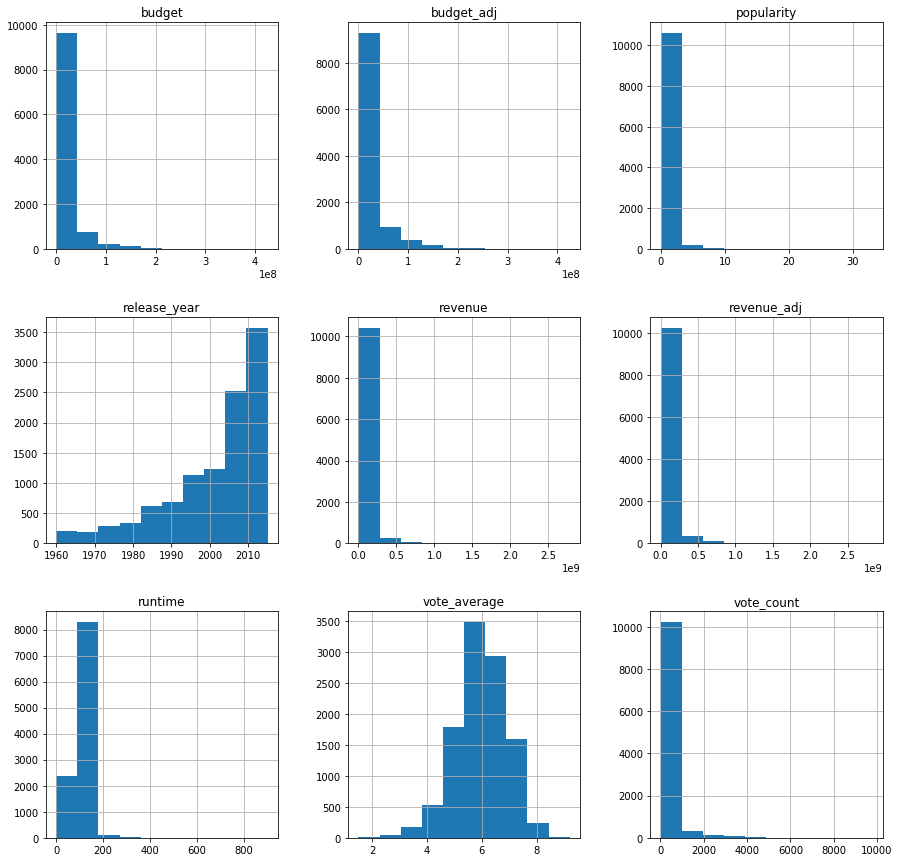

In [33]:
# visualize data distribution in histograms
df.hist(figsize=(15,15));

### Research Question 1 : what genre of movies is most popular?

In [21]:
#get the most frequent movie genre
df.genres.mode()

0    Drama
dtype: object

In [22]:
# we try to visualize statistics of popularity
# to select rows of higher popularity
df.popularity.describe()

count    10801.000000
mean         0.649450
std          1.002395
min          0.000188
25%          0.209163
50%          0.385492
75%          0.717479
max         32.985763
Name: popularity, dtype: float64

In [7]:
#get the most popular genre
df_high_pop=df[df.popularity==df.popularity.max()].genres
df_high_pop

0    Action|Adventure|Science Fiction|Thriller
Name: genres, dtype: object

### Research Question 2: what properties of movies with high revenue?

There is a positive correlation between revenue and popularity

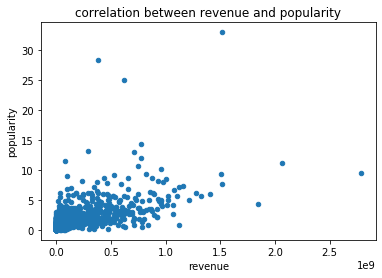

In [6]:
#construct scatter plot to test whether there is a correlarion or not between between revenue and popularity.
df.plot(x='revenue',y='popularity',kind='scatter',title='correlation between revenue and popularity');
np.corrcoef(df['revenue'],df['popularity']);

There is a pos correlation between popularity and vot_count
then there is a relation that for every popular movie it has a good vote 

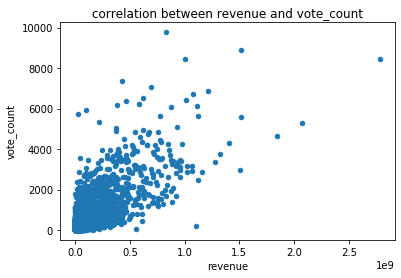

In [10]:
#construct scatter plot to test whether there is a correlarion or not between between revenue and vote_count.

df.plot(x='revenue',y='vote_count',kind='scatter',title='correlation between revenue and vote_count');
np.corrcoef(df['revenue'],df['vote_count']);

<a id='conclusions'></a>
## Conclusions
The size of the dataset is sufficient to invesigate and build insights from.
we did investigate the dataset and found insight:
we could found that it's more likely for films with high revenue to be more popular than other and to get more votes. 
We found that the most popular movies gerne is :

<ul>
<li>Action</li>
<li>Adventure</li>
<li>Science Fiction</li>
<li>Thriller</li>
</ul>



### Limitation:
The dataset includes unapproperiate information that need intuition to select relevant information only for analysis.
analysis is limited to only the provided dataset.
we found neither correlation between film populrity and released year nor runtime .


